<iframe src="https://www.kaggle.com/embed/hijest/nfl-big-data-bowl-2022-starters-eda?cellIds=1&kernelSessionId=75487025" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="NFL Big Data Bowl 2022 - Starters EDA 🏈🏈"></iframe>

## NFL Big Data Bowl 2022 DATA ANALYSIS

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

pd.set_option('display.max_columns', None)


## Players Data

In [2]:
# Loading the dataset
players = pd.read_csv('../input/nfl-big-data-bowl-2022/players.csv')

#### Players csv contain there players data. The key variable is NLF-id

* **nflid**       :  NLF-ID identififer numeric (Int 64) 
* **height**      :  Height of that player (Object)
* **weight**      :  Height of that player (Int 64)
* **birhtdate**   :  Data of Birth of that player (Object)
* **collegeName** :  College name of the player (Object)
* **Position**    :  Playing position of the player (Object)
* **displayName** :  Display name of the player (Object)


In [3]:

print(players.isnull().sum())
players

# We have null values in Birth data so lets check how we handle missing values

nflId           0
height          0
weight          0
birthDate      17
collegeName     8
Position        0
displayName     0
dtype: int64


,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


### Positions bar plot

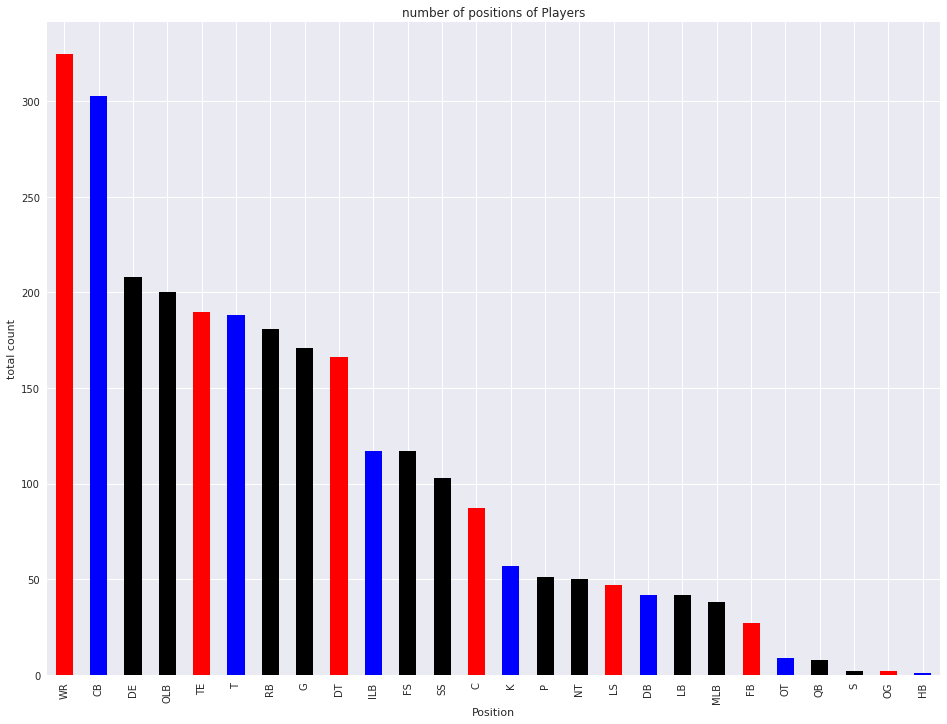

In [4]:
plt.style.use("seaborn")

color=plt.cm.flag(np.linspace(0,2,4))
players["Position"].value_counts().plot.bar(color=color,figsize=(16,12))

plt.title("number of positions of Players")
plt.xlabel('Position')
plt.ylabel("total count")
plt.show()

<AxesSubplot:>

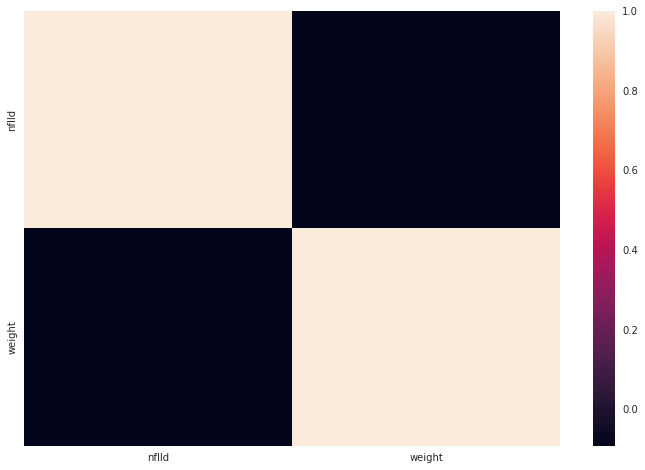

In [5]:
# relationship between features
corr = players.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr)

In [6]:

check = players['collegeName'].value_counts().reset_index()

check.columns = [
    'college', 
    'players'
]

check = check.sort_values('players').tail(40)

fig = px.bar(
    check, 
    y='college', 
    x="players", 
    orientation='h', 
    title='Top 40 colleges by number of players',
    height=900,
    width=800
)

fig.show()

## Game data

In [7]:
game = pd.read_csv('../input/nfl-big-data-bowl-2022/games.csv')
game

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN
...,...,...,...,...,...,...,...
759,2021010311,2020,17,01/03/2021,16:25:00,DEN,LV
760,2021010312,2020,17,01/03/2021,16:25:00,HOU,TEN
761,2021010313,2020,17,01/03/2021,16:25:00,IND,JAX
762,2021010314,2020,17,01/03/2021,16:25:00,LA,ARI


In [8]:
# No null values its good
print(game.isnull().sum())

gameId             0
season             0
week               0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
dtype: int64


#### game csv contains data for games records. The key variable is game-id

* **game-id**     :  game-ID identififer numeric (Int 64) 
* **season**      : season (int 64)
* **week**        :  Week of game (numeric) (Int 64)
* **gamedate**    :  Data of game (Object)
* **gameTimeEastern** :  Start time of game (time, HH:MM:SS, EST)
* **visitorTeamAbbr**    : Visiting team three-letter code (text) (Object)

### games player per year(Season)

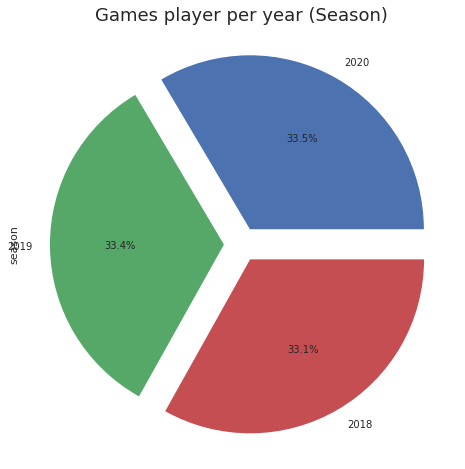

In [9]:
game["season"].value_counts().plot.pie(figsize=(12,8),explode=(0.1,0.1,0.1),autopct="%1.1f%%")
plt.title("Games player per year (Season)",fontsize=18)
plt.show()

In [10]:
check = game['gameDate'].value_counts().reset_index()

check.columns = [
    'date', 
    'games'
]

check = check.sort_values('games')

fig = px.bar(
    check, 
    y='date', 
    x="games", 
    orientation='h', 
    title='Number of games for every date', 
    height=900, 
    width=800
)

fig.show()

## Play data

### 
* 24 features we have.
* So many missing values be cafeful about them.


In [11]:
play = pd.read_csv("../input/nfl-big-data-bowl-2022/plays.csv")
play

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,02:20:00,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,NaN,NaN,SF,15,01:49:00,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,01:49:00,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,NaN,NaN,SEA,15,00:23:00,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


In [12]:
print(play.isnull().sum())

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
specialTeamsPlayType          0
specialTeamsResult            0
kickerId                    101
returnerId                13041
kickBlockerId             19879
yardlineSide                166
yardlineNumber                0
gameClock                     0
penaltyCodes              18877
penaltyJerseyNumbers      18877
penaltyYards              18877
preSnapHomeScore              0
preSnapVisitorScore           0
passResult                19934
kickLength                 3652
kickReturnYardage         14655
playResult                    0
absoluteYardlineNumber        0
dtype: int64


In [13]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

In [14]:
check = play['quarter'].value_counts().reset_index()

check.columns = [
    'quarter', 
    'plays'
]

check = check.sort_values('plays')

fig = px.pie(
    check, 
    names='quarter', 
    values="plays",  
    title='Number of plays of every quarter',
    height=500,
    width=800
)

fig.show()

### Corelation between features

<AxesSubplot:>

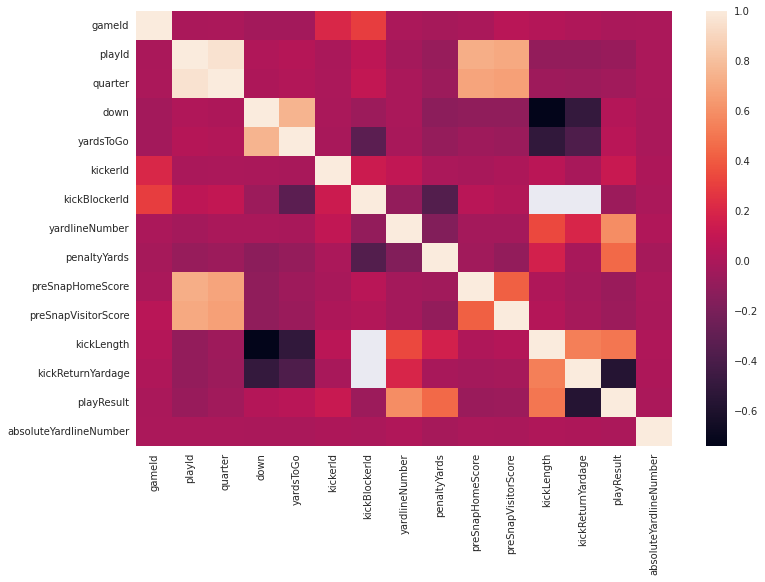

In [15]:
# relationship between features
corr = play.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr)

### Plotting missing values
* These have missing values one have to handle.



<AxesSubplot:>

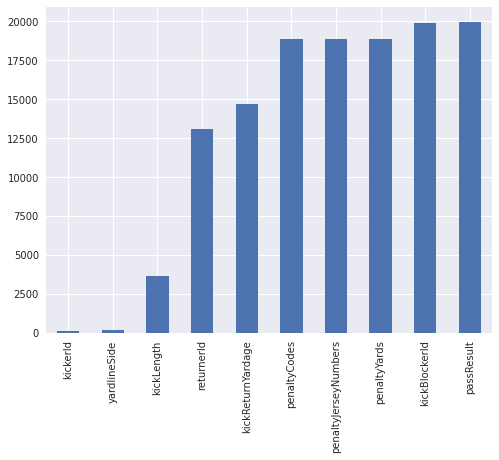

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
missing = play.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(ax=ax)

### Heat map for missing values
* Here we can see in this heat map how many values are missing.

<AxesSubplot:>

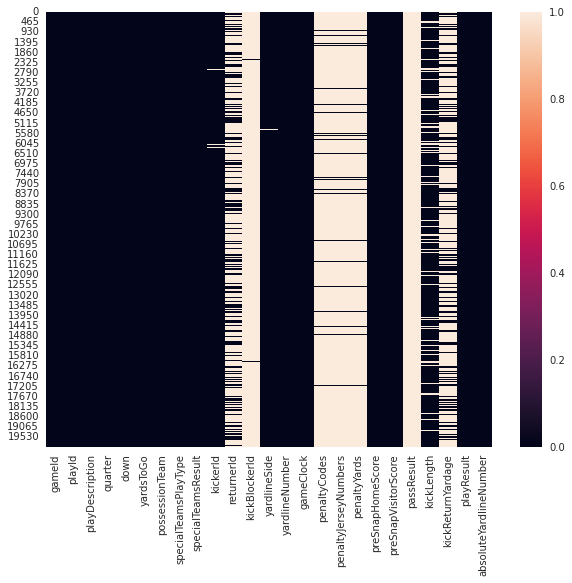

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(play.isnull(), ax=ax)

### Play result distribution 

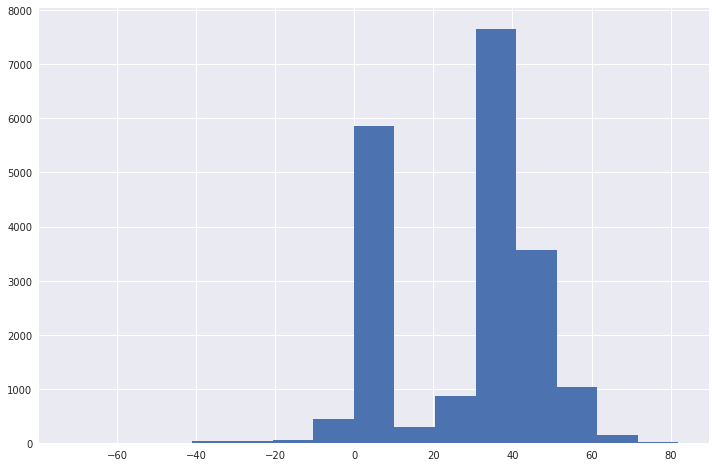

In [18]:
#To see how Play result distribution  is distributed
play["playResult"].hist(figsize=(12,8),bins=15)
plt.show()

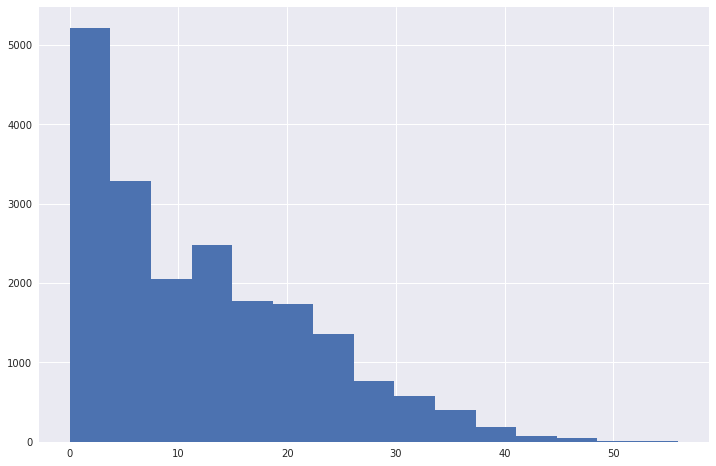

In [19]:
#preSnapHomeScore
#To see how preSnapHomeScore is distributed
play["preSnapHomeScore"].hist(figsize=(12,8),bins=15)
plt.show()

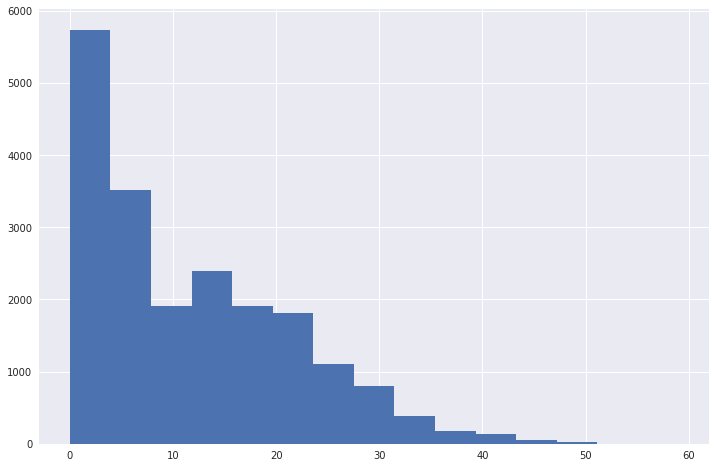

In [20]:
#To see how pre Snap Visitor Score is distributed
play["preSnapVisitorScore"].hist(figsize=(12,8),bins=15)
plt.show()